In [1]:
# Code source: Sebastian Curi and Andreas Krause.

# Python Notebook Commands
%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# Numerical Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 5)   # Change this if figures look ugly. 

# IPython Libraries
import IPython
import ipywidgets
from ipywidgets import interact, interactive, interact_manual


# Custom Libraries
from utilities.load_data import polynomial_data
from utilities import plot_helpers
from utilities.regressors import LinearRegressor
from utilities.util import gradient_descent 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


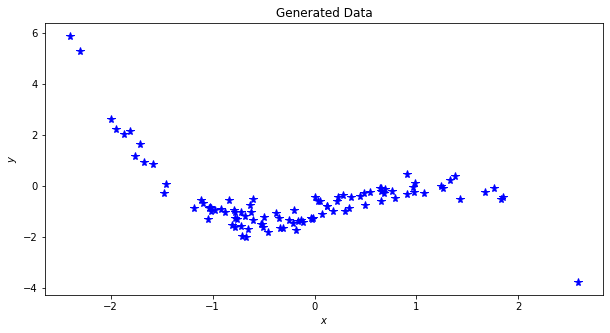

In [2]:
num_points = 100  # Number of training points.
noise = 0.3  # Noise Level (needed for data generation).

w_true = np.array([-.5, .5, 1, -1])
X, Y = polynomial_data(num_points, noise, w_true)

# Plot Data
fig = plt.subplot(111);
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Generated Data', 'y_lim': [np.min(Y)-0.5, np.max(Y)+0.5]}
plot_helpers.plot_data(X[:, -2], Y, fig=fig, options=plot_opts)

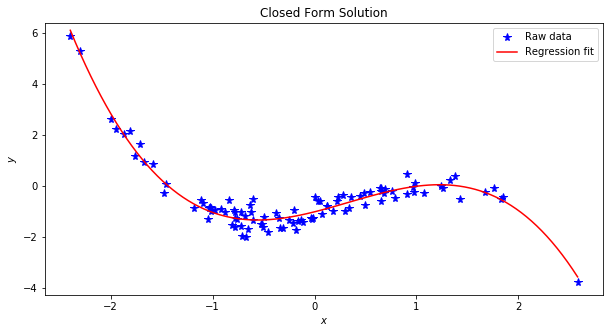

In [3]:
# Close form solution remains the same! 

dim = X.shape[1]
reg = 0  # The regularizer is set to zero by now
w_hat_closed_form = np.dot(np.linalg.pinv(np.dot(X.T, X) + reg * np.eye(dim)), np.dot(X.T, Y))
fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Closed Form Solution', 'legend': True,
             'y_lim': [np.min(Y)-0.5, np.max(Y)+0.5]}

plot_helpers.plot_data(X[:, -2], Y, fig=fig, options=plot_opts)
plot_helpers.plot_fit(X, w_hat_closed_form, fig=fig, options=plot_opts)

In [4]:
lr_widget = ipywidgets.FloatSlider(value=1e-2, min=1e-3, max=1, step=1e-3, description='Learning rate:', 
                                   style={'description_width': 'initial'}, continuous_update=False,
                                   readout_format='.3f')
n_iter_widget = ipywidgets.IntSlider(value=10, min=5, max=50, step=1, description='Number of iterations:',
                                     style={'description_width': 'initial'}, 
                                     continuous_update=False)
bs_widget = ipywidgets.IntSlider(value=32, min=1, max=X.shape[0], step=1, description='Batch size:',
                                 style={'description_width': 'initial'}, continuous_update=False)
schedule_widget = ipywidgets.RadioButtons(options=['Bold driver', 'AdaGrad', 'Annealing', 'None'],
                                          value='None', description='Learning rate heuristics:',
                                          style={'description_width': 'initial'})
def optimize_cubic(eta, n_iter, batch_size, learning_rate_scheduling):
    regressor = LinearRegressor(X, Y)
    w0 = np.array([0., 0., 0., 0.])
    if learning_rate_scheduling == 'None':
        learning_rate_scheduling = None

    opts = {'eta0': eta,
            'n_iter': n_iter,
            'batch_size': batch_size,
            'n_samples': X.shape[0],
            'algorithm': 'SGD',
            'learning_rate_scheduling': learning_rate_scheduling
            }
    trajectory, indexes = gradient_descent(w0, regressor, opts=opts)

    contourplot = None
    dataplot = plt.subplot(111)
    data_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Regression trajectory', 'legend': False,
                'y_lim': [np.min(Y)-0.5, np.max(Y)+0.5], 'sgd_point': True}
    plot_opts = {'data_opts': data_opts}

    plot_helpers.linear_regression_progression(X, Y, trajectory, indexes, regressor.test_loss,
                                               contourplot, dataplot, options=plot_opts)


interact_manual(optimize_cubic, eta=lr_widget, n_iter=n_iter_widget, batch_size=bs_widget,
                learning_rate_scheduling=schedule_widget);


interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='Learning rate:', max=1.0, …